In [1]:
#!pip3 install matplotlib

In [2]:
#!pip3 install tabula-py

In [3]:
import matplotlib
import matplotlib.pyplot as plt

In [4]:
import tabula

In [5]:
import pandas as pd
import numpy as np

In [6]:
pdf_path = "./yes_bank.pdf"

dfs = tabula.read_pdf(pdf_path, stream=True, pages = 'all')
# read_pdf returns list of DataFrames
print(len(dfs))
bank_data = pd.concat(dfs, ignore_index=True)

Got stderr: Feb 15, 2021 7:24:10 AM org.apache.pdfbox.pdmodel.graphics.color.PDICCBased fallbackToAlternateColorSpace
Feb 15, 2021 7:24:10 AM org.apache.pdfbox.pdmodel.graphics.color.PDICCBased fallbackToAlternateColorSpace
Feb 15, 2021 7:24:13 AM org.apache.pdfbox.pdmodel.graphics.color.PDICCBased fallbackToAlternateColorSpace
Feb 15, 2021 7:24:14 AM org.apache.pdfbox.pdmodel.graphics.color.PDICCBased fallbackToAlternateColorSpace



7


In [7]:
bank_data

,Transaction,Value Date,Description,Debit,Credit,Balance
0,Date,NaN,NaN,NaN,NaN,NaN
1,02/12/2017,02/12/2017,PCA:5000944243:PAYTMWAL1210203:PTM(PAYTM,899.00,0,50000.46
2,NaN,NaN,PAYTMWAL1210203-120240141263,NaN,NaN,NaN
3,02/12/2017,02/12/2017,PCA:5000944243:037044001941265:FAMILIES,469.00,0,49531.46
4,NaN,NaN,SUPER MARKET 037044001941265-733608213111,NaN,NaN,NaN
...,...,...,...,...,...,...
268,23/08/2018,23/08/2018,NET TXN: PAYTM 20180823069157713352,"6,000.00",0.00,2000.39
269,NaN,NaN,Paytm-29207,NaN,NaN,NaN
270,26/08/2018,26/08/2018,NET TXN: CREDITCARD,"1,988.12",0.00,12.27
271,NaN,NaN,0001002010000307186-14744,NaN,NaN,NaN


In [15]:
bank_data = bank_data[bank_data["Transaction"] != "Date"]
bank_data = bank_data.reset_index(drop=True)
bank_data

,Transaction,Value Date,Description,Debit,Credit,Balance
0,02/12/2017,02/12/2017,PCA:5000944243:PAYTMWAL1210203:PTM(PAYTM,899.00,NaN,50000.46
1,NaN,NaN,PAYTMWAL1210203-120240141263,NaN,NaN,NaN
2,02/12/2017,02/12/2017,PCA:5000944243:037044001941265:FAMILIES,469.00,NaN,49531.46
3,NaN,NaN,SUPER MARKET 037044001941265-733608213111,NaN,NaN,NaN
4,02/12/2017,02/12/2017,PCA:5000944243:191919191923024:INSTAKART,1423.00,NaN,48108.46
...,...,...,...,...,...,...
261,23/08/2018,23/08/2018,NET TXN: PAYTM 20180823069157713352,6000.00,0.0,2000.39
262,NaN,NaN,Paytm-29207,NaN,NaN,NaN
263,26/08/2018,26/08/2018,NET TXN: CREDITCARD,1988.12,0.0,12.27
264,NaN,NaN,0001002010000307186-14744,NaN,NaN,NaN


In [16]:
bank_data.replace(to_replace = np.nan, value = None)
bank_data

,Transaction,Value Date,Description,Debit,Credit,Balance
0,02/12/2017,02/12/2017,PCA:5000944243:PAYTMWAL1210203:PTM(PAYTM,899.00,NaN,50000.46
1,NaN,NaN,PAYTMWAL1210203-120240141263,NaN,NaN,NaN
2,02/12/2017,02/12/2017,PCA:5000944243:037044001941265:FAMILIES,469.00,NaN,49531.46
3,NaN,NaN,SUPER MARKET 037044001941265-733608213111,NaN,NaN,NaN
4,02/12/2017,02/12/2017,PCA:5000944243:191919191923024:INSTAKART,1423.00,NaN,48108.46
...,...,...,...,...,...,...
261,23/08/2018,23/08/2018,NET TXN: PAYTM 20180823069157713352,6000.00,0.0,2000.39
262,NaN,NaN,Paytm-29207,NaN,NaN,NaN
263,26/08/2018,26/08/2018,NET TXN: CREDITCARD,1988.12,0.0,12.27
264,NaN,NaN,0001002010000307186-14744,NaN,NaN,NaN


In [17]:
bank_data["Debit"] = bank_data["Debit"].str.replace(',', '').astype(float)
bank_data["Credit"] = bank_data["Credit"].str.replace(',', '').astype(float)
bank_data

AttributeError: Can only use .str accessor with string values!

In [18]:
bank_data.describe()

,Debit,Credit,Balance
count,153.000000,140.000000,153.000000
mean,6358.105948,6585.056000,23205.137712
std,15536.292530,25783.961771,37407.473777
min,0.000000,0.000000,5.530000
25%,0.000000,0.000000,809.450000
50%,899.000000,0.000000,8197.140000
75%,7214.000000,71.450000,29770.730000
max,100000.000000,200000.000000,200172.730000


In [19]:
indexes = bank_data[~ bank_data['Transaction'].isnull()].index.tolist()
indexes

[0,
 2,
 4,
 6,
 8,
 11,
 13,
 15,
 16,
 18,
 20,
 22,
 24,
 25,
 27,
 29,
 31,
 33,
 35,
 36,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 60,
 61,
 62,
 64,
 65,
 67,
 69,
 71,
 72,
 74,
 76,
 78,
 81,
 83,
 85,
 87,
 89,
 91,
 93,
 95,
 97,
 98,
 99,
 101,
 103,
 105,
 106,
 108,
 110,
 112,
 114,
 116,
 117,
 118,
 120,
 121,
 123,
 124,
 126,
 128,
 130,
 132,
 134,
 135,
 138,
 139,
 141,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 157,
 159,
 161,
 162,
 165,
 166,
 168,
 169,
 171,
 172,
 173,
 174,
 176,
 178,
 181,
 183,
 185,
 187,
 189,
 191,
 192,
 194,
 196,
 198,
 200,
 202,
 204,
 205,
 207,
 208,
 210,
 211,
 213,
 215,
 216,
 218,
 219,
 220,
 222,
 223,
 225,
 228,
 229,
 231,
 233,
 235,
 237,
 238,
 240,
 241,
 243,
 245,
 247,
 249,
 251,
 254,
 256,
 257,
 259,
 261,
 263,
 265]

In [20]:
merged_bank_data = pd.DataFrame(data=None, columns=bank_data.columns)
merged_bank_data

,Transaction,Value Date,Description,Debit,Credit,Balance


In [21]:
for i in range(len(indexes)-1):
    description = ""
    curr = indexes[i]
    for j in range(curr,indexes[i+1]):
        if isinstance(bank_data.at[j, "Description"], str):
            description += bank_data.at[j, "Description"] + ' '
    merged_bank_data.loc[len(merged_bank_data.index)] = [bank_data.at[curr, "Transaction"], bank_data.at[curr, "Value Date"],description, bank_data.at[curr, "Debit"], bank_data.at[curr, "Credit"], float(bank_data.at[curr, "Balance"])]
merged_bank_data

,Transaction,Value Date,Description,Debit,Credit,Balance
0,02/12/2017,02/12/2017,PCA:5000944243:PAYTMWAL1210203:PTM(PAYTM PAYTM...,899.00,NaN,50000.46
1,02/12/2017,02/12/2017,PCA:5000944243:037044001941265:FAMILIES SUPER ...,469.00,NaN,49531.46
2,02/12/2017,02/12/2017,PCA:5000944243:191919191923024:INSTAKART SERVI...,1423.00,NaN,48108.46
3,03/12/2017,03/12/2017,PCA:5000944243:173210000000704:MORE MEGASTORE ...,158.00,NaN,47950.46
4,03/12/2017,03/12/2017,PCA:5000944243:KFC RESTAURANTS:KFC RESTAURANTS...,159.00,NaN,47791.46
...,...,...,...,...,...,...
147,18/08/2018,18/08/2018,NET TXN: PAYU 7303342037-90349,737.10,0.0,11022.39
148,21/08/2018,21/08/2018,Funds Trf /IMPS/RRN:823312646370/XXX2710 /Axis...,1022.00,0.0,10000.39
149,21/08/2018,21/08/2018,Funds Trf /IMPS/RRN:823321822158/XXX2710 /Indi...,2000.00,0.0,8000.39
150,23/08/2018,23/08/2018,NET TXN: PAYTM 20180823069157713352 Paytm-29207,6000.00,0.0,2000.39


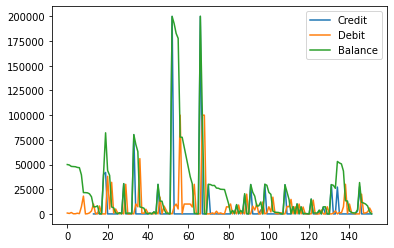

In [39]:
plt.plot(merged_bank_data["Credit"],label='Credit')
plt.plot(merged_bank_data["Debit"],label='Debit')
plt.plot(merged_bank_data["Balance"],label='Balance')
plt.legend(loc='upper right')

In [25]:
def getMonth(s):
    return s.split("/")[1]

def getYear(s):
    return s.split("/")[2]

In [37]:
result = merged_bank_data.groupby([(merged_bank_data['Transaction'].apply(lambda x: getYear(x))),(merged_bank_data['Transaction'].apply(lambda x: getMonth(x)))]).sum()
result = result.rename_axis(index=['Year', 'Month'])
result

Debit     Credit     Balance
Year Month                                  
2017 12     164714.50  114565.00   755787.72
2018 01     100572.00  112656.80   294447.98
     02     413963.21  430005.00  1575123.27
     03      84588.57   63695.00   272740.62
     04      20214.00   34045.04   101186.20
     05      36509.67   29472.00    93858.66
     06      53465.00   39600.00    42965.89
     07      14903.04   67111.00   156940.75
     08      83860.22   30751.00   257315.71

<AxesSubplot:xlabel='Year,Month'>

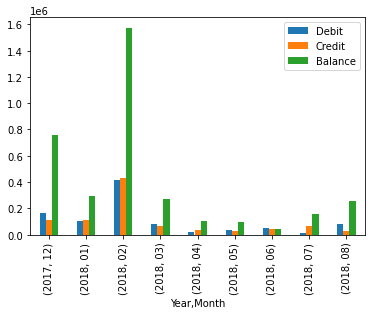

In [38]:
result.plot.bar()